In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("./data/gr_final.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y/%m/%d %H:%M")
df = df.sort_values("Timestamp")

other = ['DO_Saturation_percent','DissolvedOxygen_mgL','pH','Conductivity_mScm','Salinity_psu','Temperature_C']

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

preproc_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
feature_1 = ['Rain_mm'] + other

X = df[feature_1]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('lasso', LassoCV(cv=10, random_state=42,max_iter=20000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 获取非零系数变量名
lasso_model = pipeline.named_steps['lasso']
nonzero_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]

(rmse, r2, nonzero_features)

(13.611850669073544,
 0.6411902734659848,
 ['Rain_mm',
  'DO_Saturation_percent',
  'DissolvedOxygen_mgL',
  'pH',
  'Conductivity_mScm',
  'Salinity_psu',
  'Temperature_C'])

In [44]:
feature_2 = ['DailyRain_mm'] + other

X = df[feature_2]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('lasso', LassoCV(cv=10, random_state=42,max_iter=20000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 获取非零系数变量名
lasso_model = pipeline.named_steps['lasso']
nonzero_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]

(rmse, r2, nonzero_features)

(13.375618151248204,
 0.6535364274068005,
 ['DailyRain_mm',
  'DO_Saturation_percent',
  'DissolvedOxygen_mgL',
  'pH',
  'Conductivity_mScm',
  'Salinity_psu',
  'Temperature_C'])

In [45]:
feature_3 = ['Rain_mm','DailyRain_mm'] + other

X = df[feature_3]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('lasso', LassoCV(cv=10, random_state=42,max_iter=20000))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 获取非零系数变量名
lasso_model = pipeline.named_steps['lasso']
nonzero_features = [feature for feature, coef in zip(X.columns, lasso_model.coef_) if coef != 0]

(rmse, r2, nonzero_features)

(13.341027577374483,
 0.6553260833797401,
 ['Rain_mm',
  'DailyRain_mm',
  'DO_Saturation_percent',
  'DissolvedOxygen_mgL',
  'pH',
  'Conductivity_mScm',
  'Salinity_psu',
  'Temperature_C'])

In [48]:
from sklearn.ensemble import RandomForestRegressor
df = pd.read_csv("./data/gr_final.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y/%m/%d %H:%M")
df = df.sort_values("Timestamp")

other = ['DissolvedOxygen_mgL','DO_Saturation_percent','pH','Salinity_psu','Conductivity_mScm','Temperature_C']

preproc_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

In [50]:
feature_1 = ['Rain_mm'] + other

X = df[feature_1]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('RF', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse,r2)

9.836172486784765 0.812637735302239


In [51]:
feature_2 = ['DailyRain_mm'] + other

X = df[feature_2]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('RF', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse,r2)

8.517381015380288 0.8595111019388384


In [52]:
feature_3 = ['Rain_mm','DailyRain_mm'] + other

X = df[feature_3]
y = df["Turbidity_NTU"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('pipeline', preproc_pl),
    ('RF', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(rmse,r2)

8.517946931782122 0.8594924324410665


In [46]:
for lag in range(1, 97):
    df[f"Rain_mm_lag_{lag}"] = df["Rain_mm"].shift(lag)
    
df = df.dropna()
lag_features = [f"Rain_mm_lag_{lag}" for lag in range(1,97)]

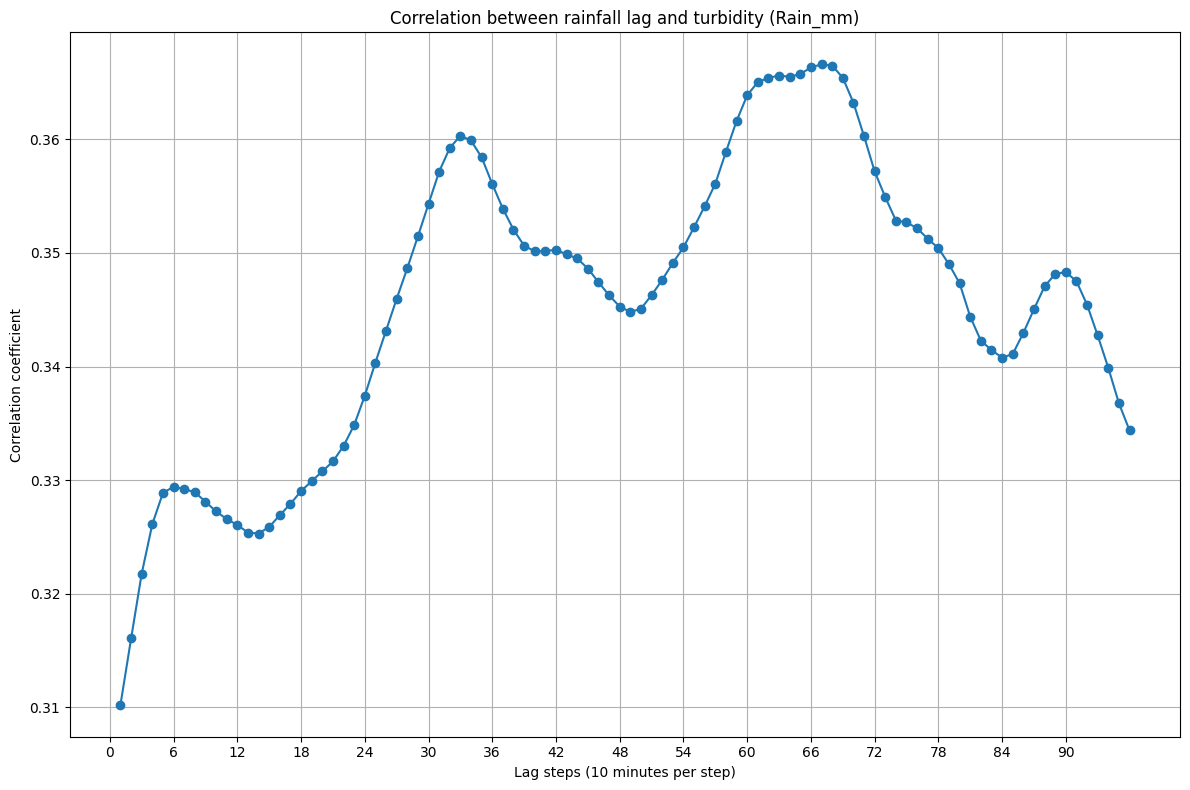

In [47]:
correlations = {
    f"lag_{lag}": df[f"Rain_mm_lag_{lag}"].corr(df["Turbidity_NTU"])
    for lag in range(1, 97)
}

plt.figure(figsize=(12, 8))
plt.plot(range(1, 97), list(correlations.values()), marker='o')
plt.title("Correlation between rainfall lag and turbidity (Rain_mm)")
plt.xlabel("Lag steps (10 minutes per step)")
plt.ylabel("Correlation coefficient")
plt.grid(True)
plt.xticks(range(0, 96, 6))
plt.tight_layout()
plt.show()

In [59]:
df = pd.read_csv("./data/gr_final.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y/%m/%d %H:%M")
df = df.sort_values("Timestamp")

other = ['DissolvedOxygen_mgL','DO_Saturation_percent','pH','Salinity_psu','Conductivity_mScm','Temperature_C']

preproc_pl = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
    ])

rf_pl = Pipeline([
        ('pipeline', preproc_pl),
        ('RF', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
    ])

In [62]:
rain_1h_features = []
df_1h = df.copy()

for start in range(12):  # 共 12 段：0-1h 到 11-12h
    shift_start = start * 6 + 1
    shift_end = shift_start + 5  # 每小时6个点
    hour_start = start
    hour_end = start + 1
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_1h[col_name] = df_1h['Rain_mm'].shift(shift_start).rolling(window=6).sum()
    rain_1h_features.append(col_name)

# 建模与评估
results_1h = []

for rain_col in rain_1h_features:
    cols = other + [rain_col]
    data = df_1h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    rf_pl = Pipeline([
        ('pipeline', preproc_pl),
        ('RF', RandomForestRegressor(n_estimators=200, max_depth=6, random_state=42))
    ])

    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_1h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_1h_df = pd.DataFrame(results_1h)
print(results_1h_df)

    Rain Feature       RMSE  R2 Score
0     Rain_0h_1h   9.484453  0.839420
1     Rain_1h_2h  10.424615  0.809625
2     Rain_2h_3h  10.755216  0.793086
3     Rain_3h_4h   9.102772  0.836550
4     Rain_4h_5h   9.686029  0.821283
5     Rain_5h_6h   9.963295  0.818374
6     Rain_6h_7h  10.037148  0.809652
7     Rain_7h_8h   9.042103  0.841520
8     Rain_8h_9h   9.696362  0.818226
9    Rain_9h_10h  11.811222  0.757769
10  Rain_10h_11h   9.690609  0.807012
11  Rain_11h_12h  11.339257  0.768645


In [61]:
rain_2h_features = []
df_2h = df.copy()

for start in range(0, 11):  # 共11个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 2
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_2h[col_name] = df_2h['Rain_mm'].shift(shift_start).rolling(window=12).sum()
    rain_2h_features.append(col_name)

# 构建模型并评估
results_2h = []

for rain_col in rain_2h_features:
    cols = other + [rain_col]
    data = df_2h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_2h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_2h_df = pd.DataFrame(results_2h)
print(results_2h_df)

    Rain Feature       RMSE  R2 Score
0     Rain_0h_2h  10.046297  0.823192
1     Rain_1h_3h  10.581573  0.799713
2     Rain_2h_4h   9.217167  0.832416
3     Rain_3h_5h   9.791118  0.817384
4     Rain_4h_6h   9.201831  0.845075
5     Rain_5h_7h   9.827351  0.817526
6     Rain_6h_8h   8.716127  0.852740
7     Rain_7h_9h   8.859630  0.848244
8    Rain_8h_10h  11.336057  0.776867
9    Rain_9h_11h   9.559837  0.812185
10  Rain_10h_12h  11.231810  0.773009


In [75]:
rain_3h_features = []
df_3h = df.copy()

for start in range(0, 10):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 3
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_3h[col_name] = df_3h['Rain_mm'].shift(shift_start).rolling(window=18).sum()
    rain_3h_features.append(col_name)

results_3h = []

for rain_col in rain_3h_features:
    cols = other + [rain_col]
    data = df_3h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_3h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_3h_df = pd.DataFrame(results_3h)
print(results_3h_df)

  Rain Feature       RMSE  R2 Score
0   Rain_0h_3h  10.638387  0.797557
1   Rain_1h_4h   9.486778  0.822468
2   Rain_2h_5h  10.056208  0.807362
3   Rain_3h_6h   8.918715  0.854462
4   Rain_4h_7h   9.666656  0.823445
5   Rain_5h_8h   8.465015  0.861103
6   Rain_6h_9h   8.764201  0.851496
7  Rain_7h_10h  11.153494  0.783996
8  Rain_8h_11h   9.554185  0.812407
9  Rain_9h_12h  11.249241  0.772304


In [76]:
rain_4h_features = []
df_4h = df.copy()

for start in range(0, 9):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 4
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_4h[col_name] = df_4h['Rain_mm'].shift(shift_start).rolling(window=24).sum()
    rain_4h_features.append(col_name)

results_4h = []

for rain_col in rain_4h_features:
    cols = other + [rain_col]
    data = df_4h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_4h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_4h_df = pd.DataFrame(results_4h)
print(results_4h_df)

  Rain Feature       RMSE  R2 Score
0   Rain_0h_4h   9.055009  0.838260
1   Rain_1h_5h   9.729328  0.819682
2   Rain_2h_6h   8.717028  0.860970
3   Rain_3h_7h   9.682641  0.822861
4   Rain_4h_8h   8.427822  0.862321
5   Rain_5h_9h   8.267035  0.867866
6  Rain_6h_10h  10.440689  0.810723
7  Rain_7h_11h   9.037979  0.832131
8  Rain_8h_12h  11.214044  0.773726


In [77]:
rain_5h_features = []
df_5h = df.copy()

for start in range(0, 8):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 5
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_5h[col_name] = df_5h['Rain_mm'].shift(shift_start).rolling(window=30).sum()
    rain_5h_features.append(col_name)

results_5h = []

for rain_col in rain_5h_features:
    cols = other + [rain_col]
    data = df_5h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_5h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_5h_df = pd.DataFrame(results_5h)
print(results_5h_df)

  Rain Feature       RMSE  R2 Score
0   Rain_0h_5h   9.648054  0.822682
1   Rain_1h_6h   8.809138  0.858016
2   Rain_2h_7h   9.762115  0.819941
3   Rain_3h_8h   8.355961  0.864659
4   Rain_4h_9h   8.250257  0.868402
5  Rain_5h_10h   9.979306  0.827082
6  Rain_6h_11h   8.394854  0.855171
7  Rain_7h_12h  10.273404  0.810094


In [78]:
rain_6h_features = []
df_6h = df.copy()

for start in range(0, 7):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 6
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_6h[col_name] = df_6h['Rain_mm'].shift(shift_start).rolling(window=36).sum()
    rain_6h_features.append(col_name)

results_6h = []

for rain_col in rain_6h_features:
    cols = other + [rain_col]
    data = df_6h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_6h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_6h_df = pd.DataFrame(results_6h)
print(results_6h_df)

  Rain Feature      RMSE  R2 Score
0   Rain_0h_6h  9.095273  0.848642
1   Rain_1h_7h  9.661553  0.823631
2   Rain_2h_8h  8.124973  0.872038
3   Rain_3h_9h  8.172608  0.870867
4  Rain_4h_10h  9.874204  0.830705
5  Rain_5h_11h  8.395633  0.855144
6  Rain_6h_12h  9.721666  0.829944


In [79]:
rain_7h_features = []
df_7h = df.copy()

for start in range(0, 6):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 7
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_7h[col_name] = df_7h['Rain_mm'].shift(shift_start).rolling(window=42).sum()
    rain_7h_features.append(col_name)

results_7h = []

for rain_col in rain_7h_features:
    cols = other + [rain_col]
    data = df_7h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_7h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_7h_df = pd.DataFrame(results_7h)
print(results_7h_df)

  Rain Feature       RMSE  R2 Score
0   Rain_0h_7h   9.453185  0.831157
1   Rain_1h_8h   7.882267  0.879569
2   Rain_2h_9h   7.884035  0.879826
3  Rain_3h_10h  10.100969  0.822840
4  Rain_4h_11h   8.272149  0.859374
5  Rain_5h_12h   9.584606  0.834705


In [80]:
rain_8h_features = []
df_8h = df.copy()

for start in range(0, 5):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 8
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_8h[col_name] = df_8h['Rain_mm'].shift(shift_start).rolling(window=48).sum()
    rain_8h_features.append(col_name)

results_8h = []

for rain_col in rain_8h_features:
    cols = other + [rain_col]
    data = df_8h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_8h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_8h_df = pd.DataFrame(results_8h)
print(results_8h_df)

  Rain Feature      RMSE  R2 Score
0   Rain_0h_8h  7.962544  0.877103
1   Rain_1h_9h  7.947858  0.877872
2  Rain_2h_10h  9.982516  0.826971
3  Rain_3h_11h  8.235756  0.860609
4  Rain_4h_12h  9.517257  0.837020


In [81]:
rain_9h_features = []
df_9h = df.copy()

for start in range(0, 4):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 9
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_9h[col_name] = df_9h['Rain_mm'].shift(shift_start).rolling(window=54).sum()
    rain_9h_features.append(col_name)

results_9h = []

for rain_col in rain_9h_features:
    cols = other + [rain_col]
    data = df_9h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_9h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_9h_df = pd.DataFrame(results_9h)
print(results_9h_df)

  Rain Feature      RMSE  R2 Score
0   Rain_0h_9h  7.948004  0.877868
1  Rain_1h_10h  9.820072  0.832556
2  Rain_2h_11h  8.060851  0.866467
3  Rain_3h_12h  9.560957  0.835520


In [82]:
rain_10h_features = []
df_10h = df.copy()

for start in range(0, 3):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 10
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_10h[col_name] = df_10h['Rain_mm'].shift(shift_start).rolling(window=60).sum()
    rain_10h_features.append(col_name)

results_10h = []

for rain_col in rain_10h_features:
    cols = other + [rain_col]
    data = df_10h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_10h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_10h_df = pd.DataFrame(results_10h)
print(results_10h_df)

  Rain Feature      RMSE  R2 Score
0  Rain_0h_10h  9.771275  0.834216
1  Rain_1h_11h  8.190304  0.862143
2  Rain_2h_12h  9.373472  0.841908


In [83]:
rain_11h_features = []
df_11h = df.copy()

for start in range(0, 2):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 11
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_11h[col_name] = df_11h['Rain_mm'].shift(shift_start).rolling(window=66).sum()
    rain_11h_features.append(col_name)

results_11h = []

for rain_col in rain_11h_features:
    cols = other + [rain_col]
    data = df_11h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_11h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_11h_df = pd.DataFrame(results_11h)
print(results_11h_df)

  Rain Feature     RMSE  R2 Score
0  Rain_0h_11h  8.17810  0.862554
1  Rain_1h_12h  9.33254  0.843285


In [84]:
rain_12h_features = []
df_12h = df.copy()

for start in range(0, 1):  # 共10个段
    shift_start = start * 6 + 1  # 每小时6个点
    hour_start = start
    hour_end = start + 12
    col_name = f'Rain_{hour_start}h_{hour_end}h'
    df_12h[col_name] = df_12h['Rain_mm'].shift(shift_start).rolling(window=72).sum()
    rain_12h_features.append(col_name)

results_12h = []

for rain_col in rain_12h_features:
    cols = other + [rain_col]
    data = df_12h[cols + [target]].dropna()

    X = data[cols]
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)


    rf_pl.fit(X_train, y_train)
    y_pred = rf_pl.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results_12h.append({
        'Rain Feature': rain_col,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_12h_df = pd.DataFrame(results_12h)
print(results_12h_df)

  Rain Feature      RMSE  R2 Score
0  Rain_0h_12h  9.372811   0.84193


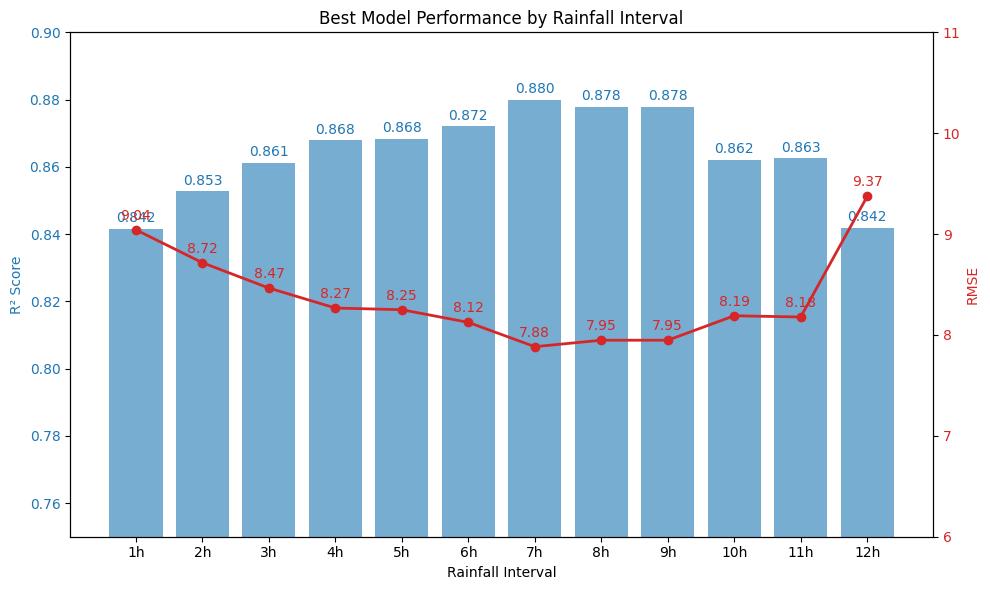

In [88]:
best_1h = results_1h_df.loc[results_1h_df['R2 Score'].idxmax()]
best_2h = results_2h_df.loc[results_2h_df['R2 Score'].idxmax()]
best_3h = results_3h_df.loc[results_3h_df['R2 Score'].idxmax()]
best_4h = results_4h_df.loc[results_4h_df['R2 Score'].idxmax()]
best_5h = results_5h_df.loc[results_5h_df['R2 Score'].idxmax()]
best_6h = results_6h_df.loc[results_6h_df['R2 Score'].idxmax()]
best_7h = results_7h_df.loc[results_7h_df['R2 Score'].idxmax()]
best_8h = results_8h_df.loc[results_8h_df['R2 Score'].idxmax()]
best_9h = results_9h_df.loc[results_9h_df['R2 Score'].idxmax()]
best_10h = results_10h_df.loc[results_10h_df['R2 Score'].idxmax()]
best_11h = results_11h_df.loc[results_11h_df['R2 Score'].idxmax()]
best_12h = results_12h_df.loc[results_12h_df['R2 Score'].idxmax()]

best_models = pd.DataFrame([best_1h, best_2h, best_3h, best_4h,best_5h, best_6h, best_7h, best_8h,best_9h, best_10h, best_11h, best_12h])
best_models['Interval'] = ['1h', '2h', '3h', '4h','5h', '6h', '7h', '8h','9h', '10h', '11h', '12h']

# 绘图：R2 + RMSE 在同一图中（双y轴）
fig, ax1 = plt.subplots(figsize=(10, 6))

# R2 Score 柱状图
color = 'tab:blue'
ax1.set_xlabel('Rainfall Interval')
ax1.set_ylabel('R² Score', color=color)
ax1.bar(best_models['Interval'], best_models['R2 Score'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.75, 0.90)
for i, v in enumerate(best_models['R2 Score']):
    ax1.text(i, v + 0.002, f'{v:.3f}', ha='center', color=color)

# RMSE 折线图
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('RMSE', color=color)
ax2.plot(best_models['Interval'], best_models['RMSE'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(6, 11)
for i, v in enumerate(best_models['RMSE']):
    ax2.text(i, v + 0.1, f'{v:.2f}', ha='center', color=color)

plt.title('Best Model Performance by Rainfall Interval')
plt.tight_layout()
plt.show()

In [89]:
print(best_7h)

Rain Feature    Rain_2h_9h
RMSE              7.884035
R2 Score          0.879826
Name: 2, dtype: object


In [93]:
from sklearn.model_selection import GridSearchCV
df_tune = df.copy()
df_tune['Rain_2h_9h'] = df_tune['Rain_mm'].shift(13).rolling(window=42).sum()

selected_features = other + ['Rain_2h_9h']
data = df_tune[selected_features + [target]].dropna()
X = data[selected_features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


rf_tune = Pipeline([
    ('pipeline', preproc_pl),
    ('RF', RandomForestRegressor(random_state=42))
])

param_grid = {
    'RF__n_estimators': [100, 200, 300],
    'RF__max_depth': [4, 6, 8, None],
    'RF__min_samples_split': [2, 5],
    'RF__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(rf_tune, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

(best_params, best_score, rmse_test, r2_test)

({'RF__max_depth': None,
  'RF__min_samples_leaf': 2,
  'RF__min_samples_split': 2,
  'RF__n_estimators': 300},
 0.9074122626464423,
 5.810544900593044,
 0.9347247928480694)